___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Linear models for classification

In this exercise, you are going to create a linear model for classification of digits. Remember it by looking at the digits dataset notebook.

In particular, you are going to use logistic regression. See the Iris dataset example to assist you in creating of this notebook.

## Logistic Regression
Start by importing the necessary libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import numpy as np

Load the digits dataset

In [2]:
#TODO
digits = load_digits()

digits.target

array([0, 1, 2, ..., 8, 9, 8])

Do the usual splitting of the data, and the fitting and scoring 

In [3]:
# TODO
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

Remember that the logistic regression formulation is the minimization of the following equation
$$ argmin_\beta \sum_{i=1}^n \left[ y_i \log \left( \frac{1}{1 + e^{-\beta^T x_i}} \right) + (1 - y_i) \log \left( 1 - \frac{1}{1 + e^{-\beta^T x_i}} \right) \right] $$
where $y_i \in \{0, 1\}$ and $x_i \in \mathbb{R}^p$.

Build the model with different penalties and solvers, computing the score for each one.

In [4]:
lr_pure = LogisticRegression(penalty='none', max_iter=10000).fit(x_train, y_train)
lr_pure.score(x_test, y_test)

0.9644444444444444

In [5]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000).fit(x_train, y_train)
lr_l1.score(x_test, y_test)

0.96

In [6]:
lr_l2 = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=10000).fit(x_train, y_train)
lr_l2.score(x_test, y_test)

0.9688888888888889

In [7]:
lr_elastic = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, l1_ratio=.1).fit(x_train, y_train)
lr_elastic.score(x_test, y_test)

0.9711111111111111

Text(0, 0.5, 'value')

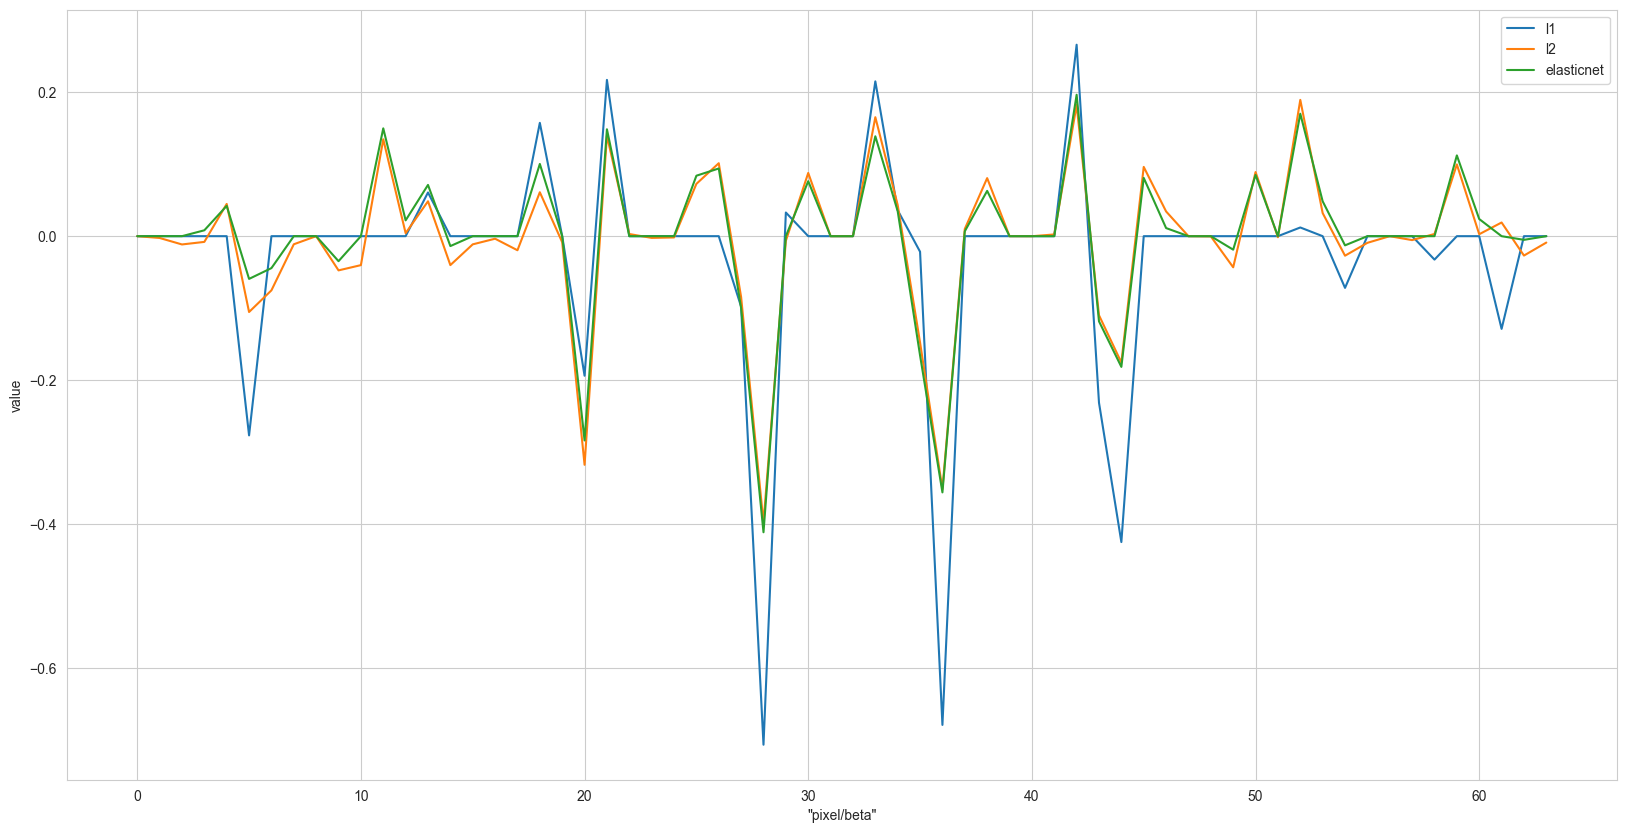

In [8]:
fig = plt.figure(figsize=(20, 10))
plt.plot(lr_l1.coef_[0])
plt.plot(lr_l2.coef_[0])
plt.plot(lr_elastic.coef_[0])
plt.legend(("l1", "l2", "elasticnet"))
plt.xlabel('"pixel/beta"')
plt.ylabel('value')


# Question
1. Which conclusions can you make about the coeficients when using the different penalties?
2. Try to change the values of `l1_ratio` and post your conclusions.

